In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Merging the data sets

In [236]:
df_1 = pd.read_csv('Hospitalisation details.csv')
df_2 = pd.read_excel('Names.xlsx')
df_3 = pd.read_csv('Medical Examinations.csv')

In [237]:
semi_comp = pd.merge(df_1, df_2, on='Customer ID')

In [238]:
complete = pd.merge(semi_comp, df_3, on = 'Customer ID')
complete.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.34,5.57,No,No,No,1,No


# EDA and Feature Engineering

In [239]:
complete.shape

(2335, 17)

In [240]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   name                    2335 non-null   object 
 10  BMI                     2335 non-null   float64
 11  HBA1C                   2335 non-null   float64
 12  Heart Issues            2335 non-null   object 
 13  Any Transplants         2335 non-null   object 
 14  Cancer history          2335 non-null   

In [241]:
complete.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


Checking for Null Values

In [242]:
complete.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [243]:
complete

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.580,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes


Identifying unique values

In [244]:
complete.nunique()

Customer ID               2335
year                        48
month                        8
date                        30
children                     6
charges                   2331
Hospital tier                4
City tier                    4
State ID                    17
name                      2335
BMI                       1335
HBA1C                      667
Heart Issues                 2
Any Transplants              2
Cancer history               2
NumberOfMajorSurgeries       4
smoker                       3
dtype: int64

In [245]:
complete['smoker'].unique()

array(['No', 'yes', '?'], dtype=object)

In [246]:
complete['smoker'].value_counts()

No     1845
yes     488
?         2
Name: smoker, dtype: int64

In [247]:
complete[complete['smoker'] == '?']

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
1700,Id635,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,"Bruns, Mr. Zachary T",25.175,4.96,No,yes,No,1,?
1775,Id560,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,"Pearlman, Mr. Oz",23.980,4.90,No,No,No,No major surgery,?


In [248]:
complete['NumberOfMajorSurgeries'].value_counts()

No major surgery    1074
1                    965
2                    274
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

In [249]:
complete['smoker'].replace('?','No', inplace=True )# I replaced it with the most common information becasue all other aspects are import for the integrity of the data
complete['smoker'].value_counts()

No     1847
yes     488
Name: smoker, dtype: int64

Dealing with State information
Given: The most important states to work with are R1011,R1012,R1013

To not loose a lot of information I will create Bins to categorize the states

In [250]:
specific_char = '?'

# Loop through columns
for col in complete.columns:
    if complete[col].dtype == 'object':  
        if specific_char in complete[col].values:
            mode_value = complete[col].mode().iloc[0]  
            complete[col] = complete[col].replace(specific_char, mode_value)



In [251]:
for col in complete.columns:
    if complete[col].dtype == 'int': 
        if specific_char in complete[col].values:
            mode_value = complete[col].mean().iloc[0] 
            complete[col] = complete[col].replace(specific_char, mode_value)

In [252]:
for col in complete.columns:
    if complete[col].dtype == 'float64':  
        if specific_char in complete[col].values:
            mode_value = complete[col].mean().iloc[0] 
            complete[col] = complete[col].replace(specific_char, mode_value)

In [253]:
complete['State ID'].value_counts()

R1013    614
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
Name: State ID, dtype: int64

In [254]:
states = ['R1013', 'R1012','R1011']

for i in complete['State ID'].values:
    if i == 'R1013':
        continue
    if i == 'R1012':
        continue
    if i == 'R1011':
        continue
    else:
        complete['State ID'].replace(i,'R0000', inplace= True)
complete['State ID'].value_counts()

R1013    614
R1012    575
R1011    574
R0000    572
Name: State ID, dtype: int64

In [255]:
complete['State ID'] = complete['State ID'].map({
                        'R1013': 0,
                        'R1012': 1,
                        'R1011': 2,
                        'R0000': 3
})

In [256]:
complete['State ID'].value_counts()

0    614
1    575
2    574
3    572
Name: State ID, dtype: int64

Cleaning Major of Surgeries since it has numbers and strings

In [257]:
complete['NumberOfMajorSurgeries'].value_counts()

No major surgery    1074
1                    965
2                    274
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

Numer of major Surgery 

No major Surgery = 0

In [258]:
complete['NumberOfMajorSurgeries'] = complete['NumberOfMajorSurgeries'].map({
                        '1': 1,
                        '2': 2,
                        '3': 3,
                        'No major surgery': 0
})
complete['NumberOfMajorSurgeries']

0       1
1       1
2       1
3       1
4       1
       ..
2330    0
2331    0
2332    2
2333    0
2334    0
Name: NumberOfMajorSurgeries, Length: 2335, dtype: int64

In [259]:
complete['NumberOfMajorSurgeries'].value_counts()

0    1074
1     965
2     274
3      22
Name: NumberOfMajorSurgeries, dtype: int64

Addressing Age

In [260]:
complete.head(1)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,0,"German, Mr. Aaron K",17.58,4.51,No,No,No,1,No


In [261]:
for i in complete['year'].values:
    str_yr = str(i)
    if len(str_yr) == 4:
        complete['year'] = complete['year'].replace(i, (2023.0 - float(str_yr)))
    else:
        continue


In [262]:
complete['year'].min(), complete['year'].max()

(19.0, 65.0)

In [263]:
complete['age_gap'] =pd.cut(pd.to_numeric(complete['year']),
                                         bins= (19,35,45,55,66), 
                                         labels=['19-35','36-45','46-55','56-55'])

In [264]:
complete['age_gap'].value_counts()

19-35    850
46-55    531
36-45    477
56-55    377
Name: age_gap, dtype: int64

Adding Gender to our dataset

In [265]:
complete.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'name', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap'],
      dtype='object')

In [266]:
complete['name']

0                     German, Mr.  Aaron K
1                   Rosendahl, Mr.  Evan P
2                       Albano, Ms.  Julie
3       Riveros Gonzalez, Mr.  Juan D. Sr.
4                    Brietzke, Mr.  Jordan
                       ...                
2330                  Kadala, Ms.  Kristyn
2331                  Osborne, Ms.  Kelsey
2332                         Lu, Mr.  Phil
2333                Lehner, Mr.  Matthew D
2334                     Hawks, Ms.  Kelly
Name: name, Length: 2335, dtype: object

In [267]:
import re
complete['gender']  = complete['name'].str.extract(r'(Mr\.|Ms\.|Mrs\.)')
complete.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'name', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap', 'gender'],
      dtype='object')

In [268]:
complete['gender'].value_counts()

Mr.     1165
Ms.     1028
Mrs.     142
Name: gender, dtype: int64

Male: 0


Female: 1

In [269]:
complete['gender'] = complete['gender'].map({
                        'Mr.': 0,
                        'Ms.':1,
                        'Mrs.':1
})

In [270]:
complete['gender'].value_counts().sum()

2335

In [271]:
complete.head(1)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age_gap,gender
0,Id2335,31.0,Jul,9,0,563.84,tier - 2,tier - 3,0,"German, Mr. Aaron K",17.58,4.51,No,No,No,1,No,19-35,0


Other features I believe we should map or discard

In [272]:
complete = complete.drop(columns=['month', 'date','Customer ID'])

In [273]:
complete = complete.drop(columns='name')
complete.columns

Index(['year', 'children', 'charges', 'Hospital tier', 'City tier', 'State ID',
       'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap', 'gender'],
      dtype='object')

In [274]:
complete['Hospital tier'].value_counts()

tier - 2    1338
tier - 3     693
tier - 1     304
Name: Hospital tier, dtype: int64

In [275]:
complete['Hospital tier'] = complete['Hospital tier'].map({
                        'tier - 1': 1,
                        'tier - 2' :2,
                        'tier - 3': 3
})



In [276]:
complete['Hospital tier'].value_counts()

2    1338
3     693
1     304
Name: Hospital tier, dtype: int64

In [277]:
complete.columns

Index(['year', 'children', 'charges', 'Hospital tier', 'City tier', 'State ID',
       'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap', 'gender'],
      dtype='object')

In [278]:
complete['City tier'].value_counts()

tier - 2    809
tier - 3    794
tier - 1    732
Name: City tier, dtype: int64

In [279]:
complete['City tier'] = complete['City tier'].map({
                        'tier - 1': 1,
                        'tier - 2' :2,
                        'tier - 3': 3
})


In [280]:
complete['City tier'].value_counts()

2    809
3    794
1    732
Name: City tier, dtype: int64

Heart Issues 


No = 0
Yes = 1

In [281]:
complete['Heart Issues'].value_counts()

No     1409
yes     926
Name: Heart Issues, dtype: int64

In [282]:
complete['Heart Issues'] = complete['Heart Issues'].map({
                        'No': 0,
                        'yes': 1
})


In [283]:
complete['Heart Issues'].value_counts()

0    1409
1     926
Name: Heart Issues, dtype: int64

Any Transplants


No = 0
Yes = 1

In [284]:
complete['Any Transplants'].value_counts()

No     2191
yes     144
Name: Any Transplants, dtype: int64

In [285]:
complete['Any Transplants'] = complete['Any Transplants'].map({
                        'No': 0,
                        'yes': 1
})


In [286]:
complete['Any Transplants'].value_counts()

0    2191
1     144
Name: Any Transplants, dtype: int64

In [287]:
complete.head(1)

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age_gap,gender
0,31.0,0,563.84,2,3,0,17.58,4.51,0,0,No,1,No,19-35,0


Cancer History


No = 0
Yes = 1

In [288]:
complete['Cancer history'].value_counts()

No     1944
Yes     391
Name: Cancer history, dtype: int64

In [289]:
complete['Cancer history'] = complete['Cancer history'].map({
                        'No': 0,
                        'Yes': 1
})


In [290]:
complete['Cancer history'].value_counts()

0    1944
1     391
Name: Cancer history, dtype: int64

Smoker


No = 0
Yes = 1

In [291]:
complete['smoker'].value_counts()

No     1847
yes     488
Name: smoker, dtype: int64

In [292]:
complete['smoker'] = complete['smoker'].map({
                        'No': 0,
                        'yes': 1
})


In [293]:
complete['smoker'].value_counts().sum()

2335

In [294]:
complete.head(5)

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age_gap,gender
0,31.0,0,563.84,2,3,0,17.58,4.51,0,0,0,1,0,19-35,0
1,31.0,0,570.62,2,1,0,17.60,4.39,0,0,0,1,0,19-35,0
2,30.0,0,600.00,2,1,0,16.47,6.35,0,0,1,1,0,19-35,1
3,31.0,0,604.54,3,3,0,17.70,6.28,0,0,0,1,0,19-35,0
4,25.0,0,637.26,3,3,0,22.34,5.57,0,0,0,1,0,19-35,0


In [295]:
complete['children'].value_counts()

0    1189
1     379
3     378
2     346
4      25
5      18
Name: children, dtype: int64

EDA

Text(0.5, 1.0, 'Charge Total Frequency')

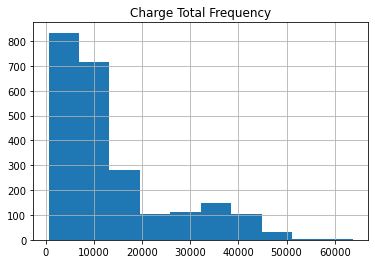

In [296]:
complete['charges'].hist()
plt.title('Charge Total Frequency')

Text(0.5, 1.0, 'Charge Points')

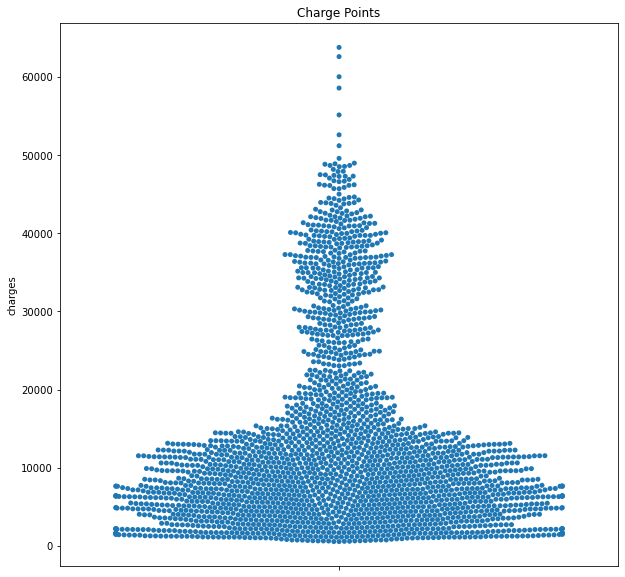

In [297]:
plt.figure(figsize=(10,10))
sns.swarmplot(data= complete, y = complete['charges'], hue = complete['gender'])
plt.title('Charge Points')

<AxesSubplot:ylabel='charges'>

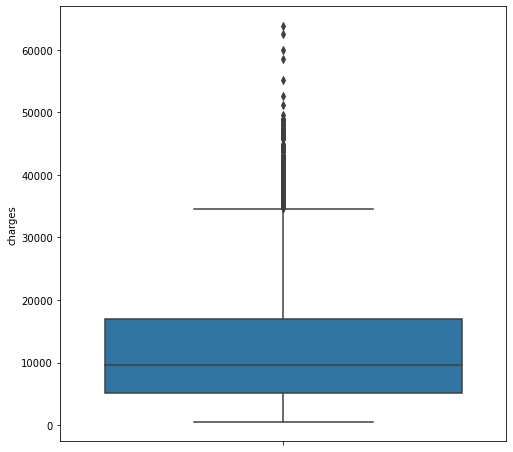

In [298]:
plt.figure(figsize=(8,8))
sns.boxplot(y =complete['charges'])

<AxesSubplot:>

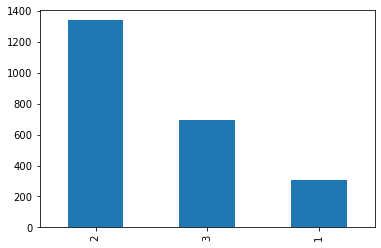

In [299]:
complete['Hospital tier'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Hospital tier', ylabel='Count'>

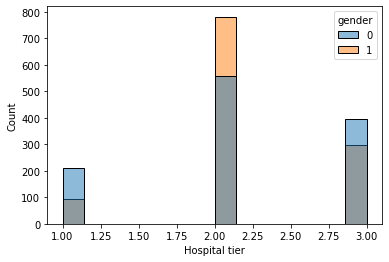

In [300]:
sns.histplot(data= complete, x = 'Hospital tier', hue= 'gender')

We see that Tier 2 Hosptitals has more Female patients than Tier 1 and 3 but Tier 1 and 3 had more Male patients in general

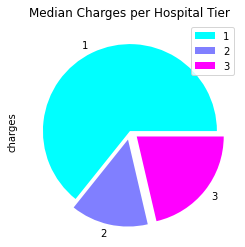

In [301]:
explode = (0, 0.1, .1)
complete.groupby('Hospital tier')['charges'].median().plot(kind ='pie', colormap= 'cool', legend= True, explode = explode, title= 'Median Charges per Hospital Tier')
plt.show();


We see that the media charge at the Tier 1 hospital was the largest in comparison to the other two Hospitals

In [302]:
complete.columns

Index(['year', 'children', 'charges', 'Hospital tier', 'City tier', 'State ID',
       'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap', 'gender'],
      dtype='object')

<AxesSubplot:xlabel='Hospital tier', ylabel='Count'>

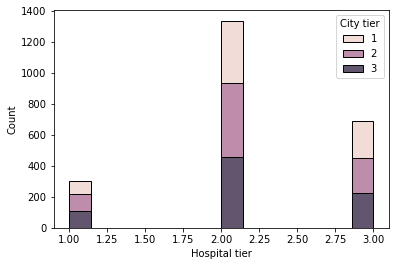

In [303]:
sns.histplot( x=complete["Hospital tier"], hue= complete['City tier'], multiple= 'stack')

<AxesSubplot:xlabel='age_gap', ylabel='charges'>

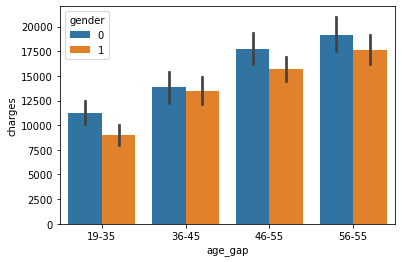

In [304]:
sns.barplot(data= complete,x=complete['age_gap'], y = complete['charges'], hue= complete['gender'])


# Statistics   

In [305]:
complete.groupby('Hospital tier')['charges'].mean()

Hospital tier
1    30129.198586
2    11865.268767
3     9462.269307
Name: charges, dtype: float64

Hospital Hypothesis testing

$H_0$ = The average  hospitalization cost for three type of hospitals are not significantly different

In [306]:
hosp_1 = complete[complete['Hospital tier'] == 1]['charges']
hosp_2 = complete[complete['Hospital tier'] == 2]['charges']
hosp_3 = complete[complete['Hospital tier'] == 3]['charges']

In [307]:
import scipy.stats as stats

F, p = stats.f_oneway(hosp_1, hosp_2,hosp_3)

print("F-statistic:", F)
print("p-value:", p)


F-statistic: 498.3038399629512
p-value: 6.505496697290111e-181


In [308]:
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: The average hospitalization costs are significantly different.")
else:
    print("Fail to reject null hypothesis: We can't say that the average hospitalization costs are significantly different.")

Reject null hypothesis: The average hospitalization costs are significantly different.


City Hypothesis Testing

$H_0$ = The average hospitalization cost for the three types of citites are not significantly different



In [309]:
city_1 = complete[complete['City tier'] == 1]['charges']
city_2 = complete[complete['City tier'] == 2]['charges']
city_3 = complete[complete['City tier'] == 3]['charges']

In [310]:
F, p = stats.f_oneway(city_1, city_2,city_3)

print("F-statistic:", F)
print("p-value:", p)


F-statistic: 1.3921799249729778
p-value: 0.24873941194436716


In [311]:
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: The average hospitalization costs in the three cities are significantly different.")
else:
    print("Fail to reject null hypothesis: We can't say that the average hospitalization costs in the three cities are significantly different.")

Fail to reject null hypothesis: We can't say that the average hospitalization costs in the three cities are significantly different.


Smoker Analysis

$H_0$ = The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

Non-smoker = 0

In [312]:
smoker_0= complete[complete['smoker'] == 0]['charges']
smoker_1= complete[complete['smoker'] == 1]['charges']


In [313]:
F, p = stats.f_oneway(smoker_0, smoker_1)

print("F-statistic:", F)
print("p-value:", p)


F-statistic: 5516.158096563916
p-value: 0.0


In [314]:
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: The average hospitalization costs for smoker and non-smoker are significantly different.")
else:
    print("Fail to reject null hypothesis: We can't say that the average hospitalization costs for smoker and non-smoker are significantly different.")

Reject null hypothesis: The average hospitalization costs for smoker and non-smoker are significantly different.


Testing if heart isues and smoking are independent

In [315]:
complete.columns

Index(['year', 'children', 'charges', 'Hospital tier', 'City tier', 'State ID',
       'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'age_gap', 'gender'],
      dtype='object')

In [316]:
cont_tab = pd.crosstab(complete['smoker'],complete['Heart Issues'])
cont_tab

Heart Issues,0,1
smoker,,
0,1112,735
1,297,191


In [317]:
from scipy.stats import chi2_contingency

chi2_score,p,dof,ex_fre  = chi2_contingency(cont_tab)
p

0.8328787488420707

In [318]:
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: Smoking and heart issues are dependent.")
else:
    print("Fail to reject null hypothesis: Smoking and heart issues are independent.")

Fail to reject null hypothesis: Smoking and heart issues are independent.


# Machine Learning

In [319]:
complete.head(5)

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age_gap,gender
0,31.0,0,563.84,2,3,0,17.58,4.51,0,0,0,1,0,19-35,0
1,31.0,0,570.62,2,1,0,17.60,4.39,0,0,0,1,0,19-35,0
2,30.0,0,600.00,2,1,0,16.47,6.35,0,0,1,1,0,19-35,1
3,31.0,0,604.54,3,3,0,17.70,6.28,0,0,0,1,0,19-35,0
4,25.0,0,637.26,3,3,0,22.34,5.57,0,0,0,1,0,19-35,0


In [320]:
corr_mat = complete.corr()
corr_mat

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender
year,1.000000,-0.003524,0.304590,0.133767,-0.010229,0.016529,0.052450,0.457904,0.190028,-0.381204,-0.098665,0.151002,0.013830,0.018750
children,-0.003524,1.000000,0.059122,-0.056550,-0.016571,0.005438,-0.004793,-0.100593,0.024967,-0.142340,-0.027918,-0.111019,0.019164,-0.017390
charges,0.304590,0.059122,1.000000,-0.448126,0.034259,0.122385,0.347695,0.142246,0.051213,-0.121881,-0.022709,0.058482,0.838314,-0.063895
Hospital tier,0.133767,-0.056550,-0.448126,1.000000,-0.041381,0.028370,-0.104489,0.056794,0.050896,0.008482,-0.020220,0.029367,-0.473938,0.010958
City tier,-0.010229,-0.016571,0.034259,-0.041381,1.000000,-0.002504,0.037198,-0.007374,0.022117,0.006999,-0.018997,0.027512,0.031343,-0.060496
State ID,0.016529,0.005438,0.122385,0.028370,-0.002504,1.000000,0.186993,-0.028732,0.012596,-0.001716,0.029709,0.003967,0.062997,0.017376
BMI,0.052450,-0.004793,0.347695,-0.104489,0.037198,0.186993,1.000000,-0.006111,0.016937,0.016597,-0.019010,0.020850,0.109280,-0.016351
HBA1C,0.457904,-0.100593,0.142246,0.056794,-0.007374,-0.028732,-0.006111,1.000000,0.010254,-0.160079,-0.170799,-0.088516,0.009076,0.024760
Heart Issues,0.190028,0.024967,0.051213,0.050896,0.022117,0.012596,0.016937,0.010254,1.000000,-0.138683,0.110060,0.208136,-0.005443,0.001766
Any Transplants,-0.381204,-0.142340,-0.121881,0.008482,0.006999,-0.001716,0.016597,-0.160079,-0.138683,1.000000,-0.114974,0.161075,-0.022310,-0.007670


<AxesSubplot:>

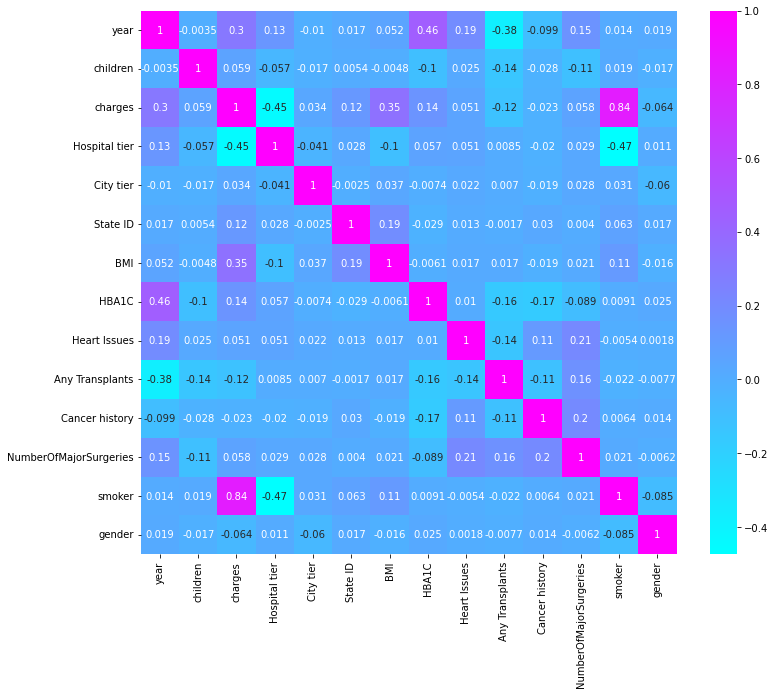

In [321]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, cmap='cool', annot= True)

In [322]:
complete.head()

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,age_gap,gender
0,31.0,0,563.84,2,3,0,17.58,4.51,0,0,0,1,0,19-35,0
1,31.0,0,570.62,2,1,0,17.60,4.39,0,0,0,1,0,19-35,0
2,30.0,0,600.00,2,1,0,16.47,6.35,0,0,1,1,0,19-35,1
3,31.0,0,604.54,3,3,0,17.70,6.28,0,0,0,1,0,19-35,0
4,25.0,0,637.26,3,3,0,22.34,5.57,0,0,0,1,0,19-35,0


<AxesSubplot:xlabel='BMI', ylabel='Count'>

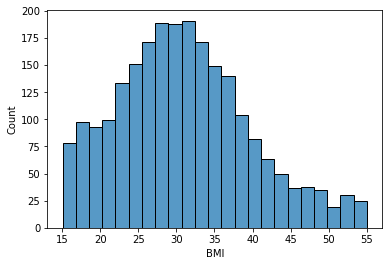

In [323]:
sns.histplot(data=complete, x = "BMI")


<AxesSubplot:xlabel='HBA1C', ylabel='Count'>

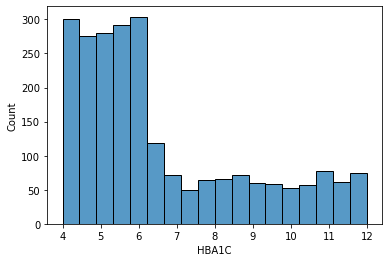

In [324]:
sns.histplot(data = complete, x = "HBA1C")

<AxesSubplot:xlabel='year', ylabel='Count'>

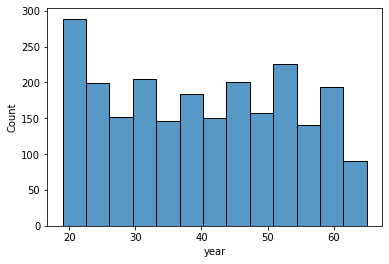

In [325]:
sns.histplot(data= complete, x = 'year')

In [326]:
complete.drop(columns= 'age_gap', axis= 1, inplace= True)


In [327]:
complete['BMI'].min(), complete['BMI'].max(),complete['HBA1C'].min(), complete['HBA1C'].max(), complete['charges'].min(), complete['charges'].max()

(15.01, 55.05, 4.0, 12.0, 563.84, 63770.43)

# Trial # 1

In [328]:
from sklearn.model_selection import train_test_split

X = complete.drop(columns='charges', axis= 1)
Y = complete['charges']



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2) 

In [329]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor( random_state=42)

#train the model
sgd_reg.fit(X_train, y_train)



c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(random_state=42)

Test the model

In [330]:

y_pred = sgd_reg.predict(X_test)

Accuracy results

In [331]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4145690810.1746974
Root Mean Squared Error: 64387.03914744564


It looks like our model is running poorly, let's try runing hyperparameter tuning and cross validate it as well

In [332]:
import warnings

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppress DomainWarning
from statsmodels.tools.sm_exceptions import DomainWarning
warnings.filterwarnings("ignore", category=DomainWarning)


from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)




from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'loss': ['squared_loss', 'huber'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(sgd_reg, param_grid, cv= 5, scoring='neg_root_mean_squared_error' )


grid.fit(X,Y)

grid.best_params_

estimator = grid.best_estimator_

cv_results = cross_val_score(estimator, X_train, y_train, cv=5)

print(f"Cross-validation scores: {cv_results}")
print(f"Mean Cross-validation score: {np.mean(cv_results)}")

y_pred = estimator.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# To get the Root Mean Squared Error (RMSE), you can take the square root of the MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")



c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

Cross-validation scores: [0.7804595  0.83660537 0.82915369 0.79544271 0.79037603]
Mean Cross-validation score: 0.8064074595255301
Mean Squared Error: 23291078.68817178
Root Mean Squared Error: 4826.083162169067


***Results***
- Lets plot how accurate our model predicted the values

In [333]:
y_pred = estimator.predict(X)
residuals = Y - y_pred
residuals

0       -2959.236994
1       -3500.168374
2       -2383.251810
3         922.024873
4        1207.508714
            ...     
2330    23121.495962
2331    25605.374694
2332    21740.854442
2333    32895.545310
2334    23573.824456
Name: charges, Length: 2335, dtype: float64

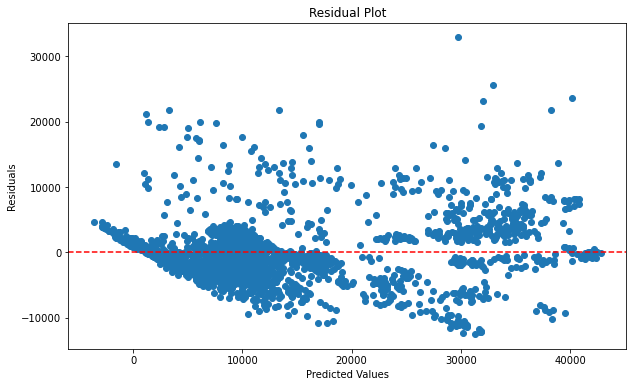

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


We want to see our residuals as close to 0 as possible. We see that after the 10k predictions, our model starts to fail

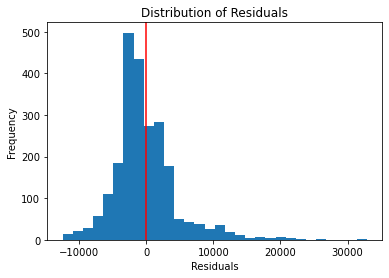

In [335]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

***Results***

In [336]:
X_train.head()

,year,children,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender
1036,57.0,0,3,1,0,20.75,5.18,1,0,0,2,0,1
2292,52.0,0,2,2,0,38.06,6.98,0,0,0,0,1,1
2264,39.0,3,1,1,0,38.39,4.25,0,0,0,1,1,0
1522,63.0,0,3,1,2,21.40,9.03,0,0,0,0,0,0
1329,54.0,2,3,2,2,35.90,4.85,1,0,1,1,0,1


# Trial #2

Our Results were not favorable, let's try standardizing some of the columns

In [337]:
from sklearn.preprocessing import StandardScaler

feat_to_scale = ['BMI']

prescaled_data = X[feat_to_scale]

#build the scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(prescaled_data)

#results will be an array. I need to convert back to a DF
# use feat_to_scale list to define column names - otherwise, you'll see 0 and 1 headers
scaled_df = pd.DataFrame(scaled_data, columns=feat_to_scale)




In [338]:
X.drop(feat_to_scale, axis=1)

X_scaled = pd.concat([X.drop(feat_to_scale, axis=1),
                      scaled_df]
                      , axis=1) 

X_scaled.head()


,year,children,Hospital tier,City tier,State ID,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender,BMI
0,31.0,0,2,3,0,4.51,0,0,0,1,0,0,-1.532301
1,31.0,0,2,1,0,4.39,0,0,0,1,0,0,-1.530012
2,30.0,0,2,1,0,6.35,0,0,1,1,0,1,-1.659300
3,31.0,0,3,3,0,6.28,0,0,0,1,0,0,-1.518571
4,25.0,0,3,3,0,5.57,0,0,0,1,0,0,-0.987692


In [340]:
import warnings

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppress DomainWarning
from statsmodels.tools.sm_exceptions import DomainWarning
warnings.filterwarnings("ignore", category=DomainWarning)

# Your GLM model code here


# Suppress DomainWarning
warnings.filterwarnings("ignore", category=FutureWarning)

from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=.2) 

sgd_reg = SGDRegressor( random_state=42)

#train the model
sgd_reg.fit(X_train, y_train)


param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'loss': ['squared_loss', 'huber'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(sgd_reg, param_grid, cv= 5, scoring='neg_root_mean_squared_error' )


grid.fit(X,Y)

estimator = grid.best_estimator_


cv_results = cross_val_score(estimator, X_train, y_train, cv=5)

print(f"Cross-validation scores: {cv_results}")
print(f"Mean Cross-validation score: {np.mean(cv_results)}")

y_pred = estimator.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# To get the Root Mean Squared Error (RMSE), you can take the square root of the MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")




c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

Cross-validation scores: [0.8499968  0.83180469 0.80543423 0.82914959 0.86894391]
Mean Cross-validation score: 0.8370658434009292
Mean Squared Error: 208415391.42197126
Root Mean Squared Error: 14436.59902546203


***Results***
-  Standardizing BMI worsen my model, let's plot and see

In [341]:
residuals = y_test- y_pred


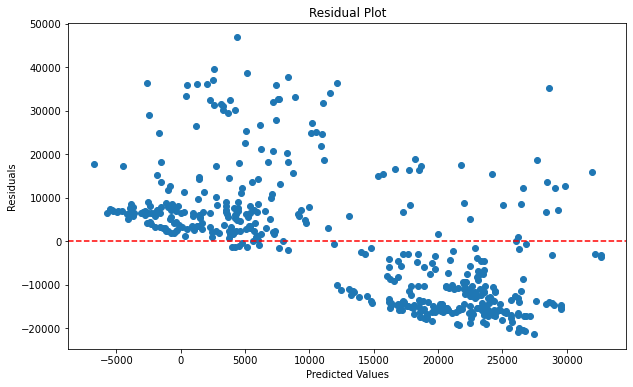

In [342]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


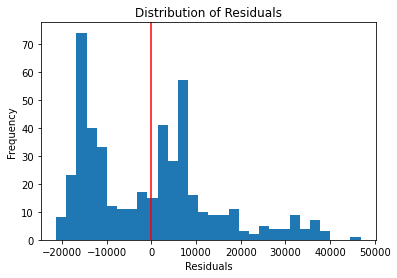

In [343]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

# Trial # 3 

Best RF Params:  {'max_depth': 10, 'n_estimators': 200}
RF Test RMSE:  3605.792632543789


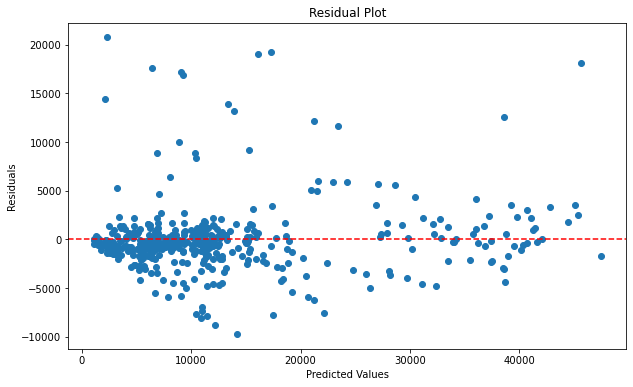

In [344]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
# Grid search
grid_rf = GridSearchCV(rf, param_grid,scoring='neg_root_mean_squared_error', cv=5)
grid_rf.fit(X_train, y_train)

y_pred = grid_rf.predict(X_test)
print("Best RF Params: ", grid_rf.best_params_)
print("RF Test RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


residuals = y_test- y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


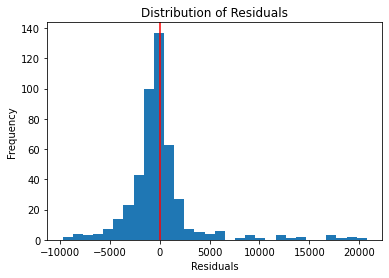

In [345]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

# Trial # 4

Best XGB Params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGB Test RMSE:  3657.618489006806


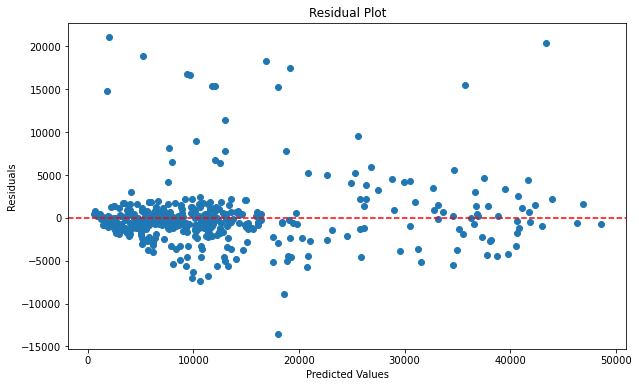

In [346]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}
# Grid search
grid_xgb = GridSearchCV(xg_reg, param_grid_xgb,scoring='neg_root_mean_squared_error', cv=5)
grid_xgb.fit(X_train, y_train)

y_pred=  grid_xgb.predict(X_test)

print("Best XGB Params: ", grid_xgb.best_params_)
print("XGB Test RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


residuals = y_test- y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [347]:
X_test.shape

(467, 13)

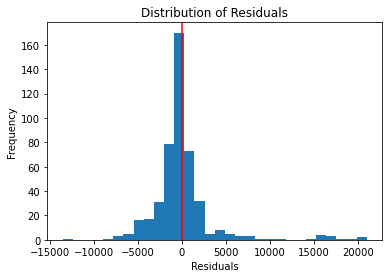

In [348]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

***Observations***
- The first run of my models with my initial data clean up and data engineering prove unseccesful in all models cases. 
- Standardizing some of the deatures did not help as well
- The target variable has not bee modified, I will use log scale to maintain outlier integrity

# Target log adjustment

In [349]:
complete['log_charges'] = np.log1p(complete['charges'])



# SGDR Trial # 5 

In [352]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor
import warnings


# Suppress DomainWarning
warnings.filterwarnings("ignore", category=FutureWarning)

from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


X = complete.drop(columns = ['charges', 'log_charges'])
Y = complete['log_charges']

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 50)




In [353]:
sdg = SGDRegressor(random_state = 42)

In [354]:
import warnings

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppress DomainWarning
from statsmodels.tools.sm_exceptions import DomainWarning
warnings.filterwarnings("ignore", category=DomainWarning)

from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'loss': ['squared_loss', 'huber'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]}

grid = GridSearchCV(sdg, param_grid, cv= 5,  scoring='neg_root_mean_squared_error')

grid.fit(X_train, y_train)

estimator = grid.best_estimator_

cv_results = cross_val_score(estimator, X_train, y_train, cv = 5)

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

In [355]:
print(f"Cross-validation scores: {cv_results}")
print(f"Mean Cross-validation score: {np.mean(cv_results)}")

y_pred = estimator.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# To get the Root Mean Squared Error (RMSE), you can take the square root of the MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Cross-validation scores: [0.69058975 0.61751005 0.68974829 0.73647069 0.70310803]
Mean Cross-validation score: 0.6874853621420922
Mean Squared Error: 0.2593246540753813
Root Mean Squared Error: 0.509239289603013


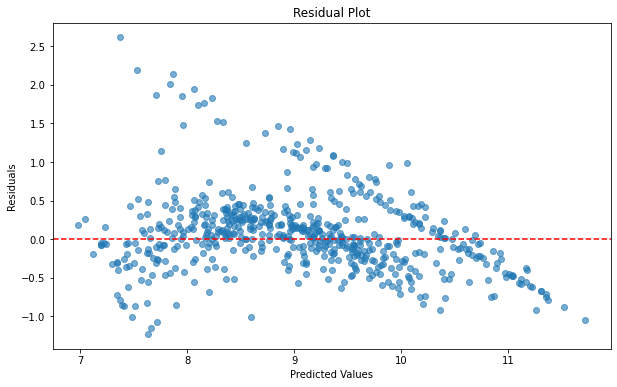

In [356]:
residuals = y_test- y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha = .6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


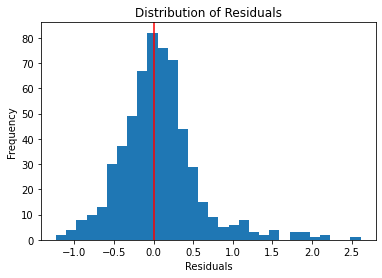

In [357]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

# Trial # 6 Forest Regressor, target adjustment

Best RF Params:  {'max_depth': 10, 'n_estimators': 100}
RF Test RMSE:  0.33668390466859094


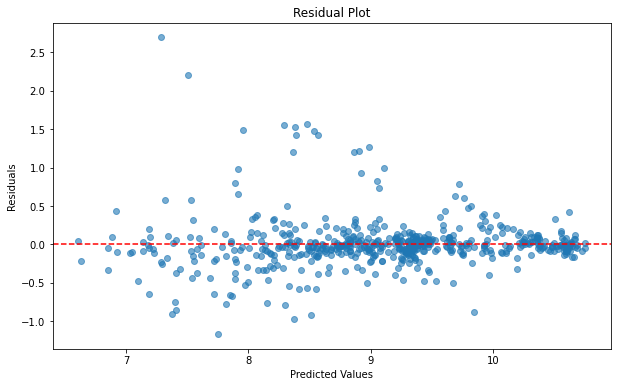

In [358]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
# Grid search
grid_rf = GridSearchCV(rf, param_grid,scoring='neg_root_mean_squared_error', cv=5)
grid_rf.fit(X_train, y_train)

y_pred = grid_rf.predict(X_test)
print("Best RF Params: ", grid_rf.best_params_)
print("RF Test RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


residuals = y_test- y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha = .6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



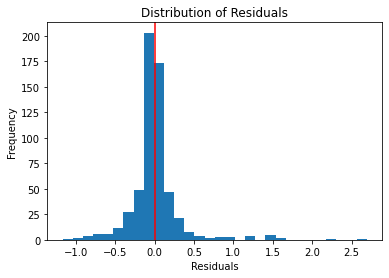

In [359]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

# Trial # 7 XGB Target Adjustment

Best XGB Params:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGB Test RMSE:  0.33796427992413947


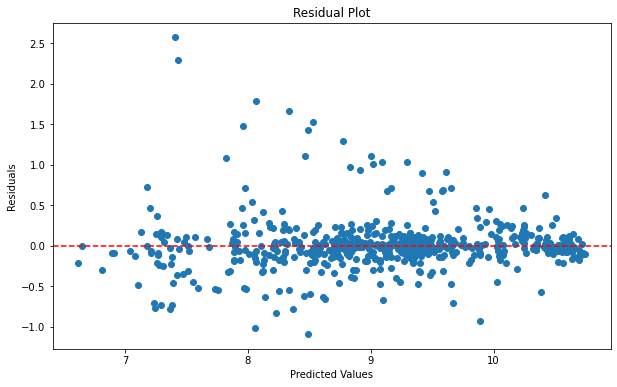

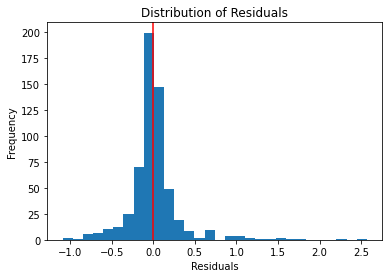

In [360]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}
# Grid search
grid_xgb = GridSearchCV(xg_reg, param_grid_xgb,scoring='neg_root_mean_squared_error', cv=5)
grid_xgb.fit(X_train, y_train)

y_pred=  grid_xgb.predict(X_test)

print("Best XGB Params: ", grid_xgb.best_params_)
print("XGB Test RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


residuals = y_test- y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x = 0, color = 'r')
plt.title('Distribution of Residuals')
plt.show()

### **From Trials 5 to 7 you see much more promising predictions for our Model, changing the target value to a Log, greatly improved our results**

## ***Real Test Case Example:***

Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is
12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier 1 city and her state’s
State ID is R1011. She lives with her partner and two children. She was found to be
nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no
transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be
estimated using tier 1 hospitals.

- BMI needed to be caluculate

In [361]:
data ={
    'year':35,
    'children':2,
    'Hospital tier': 1,
    'City tier': 1,
    'State ID' : 2,
    'BMI': 29.41,
    'HBA1C': 5.8,
    'Heart Issues': 0,
    'Any Transplants': 0,
    'Cancer history': 1,
    'NumberOfMajorSurgeries':0,
    'smoker':1,
    'gender':1
    
}

In [362]:
lady_Test = pd.DataFrame(data, index = [0])

In [363]:
lady_Test

,year,children,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender
0,35,2,1,1,2,29.41,5.8,0,0,1,0,1,1


### XGB Prediction

In [364]:
y_pred_XBG =  grid_xgb.predict(lady_Test)


In [365]:
xgb_ = np.exp(y_pred_XBG)
xgb_

array([20353.576], dtype=float32)

### Random Forest Regressor Prediction

In [366]:
y_pred_RF = grid_rf.predict(lady_Test)
rf_ = np.exp(y_pred_RF)
rf_

array([22257.76501075])

### SGDR Prediction

In [367]:
y_pred_SGDR = estimator.predict(lady_Test)
sgdr_ = np.exp(y_pred_SGDR)
sgdr_

array([21889.49748076])

### Predicted Cost

In [368]:
predicted_value_total = (xgb_ + rf_ + sgdr_) / 3 
predicted_value_total                         


array([21500.27955446])

In [369]:
complete.to_csv('complete.csv', index = False)

In [370]:
complete

,year,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender,log_charges
0,31.0,0,563.84,2,3,0,17.580,4.51,0,0,0,1,0,0,6.336543
1,31.0,0,570.62,2,1,0,17.600,4.39,0,0,0,1,0,0,6.348474
2,30.0,0,600.00,2,1,0,16.470,6.35,0,0,1,1,0,1,6.398595
3,31.0,0,604.54,3,3,0,17.700,6.28,0,0,0,1,0,0,6.406121
4,25.0,0,637.26,3,3,0,22.340,5.57,0,0,0,1,0,0,6.458746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,34.0,0,55135.40,1,2,1,35.530,5.45,0,0,0,0,1,1,10.917565
2331,32.0,1,58571.07,1,3,3,38.095,6.05,0,0,0,0,1,1,10.978013
2332,53.0,3,60021.40,1,1,1,34.485,11.87,1,0,0,2,1,0,11.002473
2333,46.0,0,62592.87,2,3,0,30.360,5.77,0,0,0,0,1,0,11.044423
